# Kalibirierung übers Prandlt Rohr

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import math

# https://stackoverflow.com/questions/3410976/how-to-round-a-number-to-significant-figures-in-python
# round_to_n = lambda x, n: x if x == 0 else round(x, -int(math.floor(math.log10(abs(x)))) + (n - 1))
# round_to_n = lambda x, n: round(x, -int(floor(log10(x))) + (n - 1))

def round_to_n(x, n=1):
    if n != 1:
        return round(x, -int(floor(log10(x))) + (n - 1))
    else:
        return round(x, -int(floor(log10(x))))


def round_to_reference(x, y):
    # return round(x, -int(floor(log10(y))))
    return round(x, -int(floor(log10(y))) + (n - 1))

def round_to_1(x):
    return round(x, -int(floor(log10(x))))

label_size = 20
plt.rcParams.update({'font.size': label_size, 'legend.title_fontsize': 16, 'legend.fontsize': 16, "axes.labelsize": label_size, "xtick.labelsize": label_size, 
"ytick.labelsize": label_size, "axes.labelpad": 4, "lines.markersize": 10, "lines.linewidth": 2})

rho_Fluid = 810.0
rho_Luft = 1.204
g = 9.81
Delta_x = 0.5 * 0.001 # in m

In [99]:
[round_to_n(x,2) for x in v]


C:\Users\timom\anaconda3\lib\site-packages\sigfig\sigfig.py:265: UserWarning: cannot have less that 1 significant figure, setting to 1
  warn('cannot have less that 1 significant figure, setting to 1')


[0.73, 3.0, 7.0, 9.0, 10.0, 10.0, 10.0, 10.0, 20.0, 20.0, 20.0, 20.0, 30.0]

In [90]:
np.round(v,-(np.floor(np.log10(v))).astype(int))

TypeError: only integer scalar arrays can be converted to a scalar index

curve_fit: m = 4.749 +/- 0.031
Linregress: m = 4.802, b = -0.199
Polyfit: m = 4.802, b = -0.199


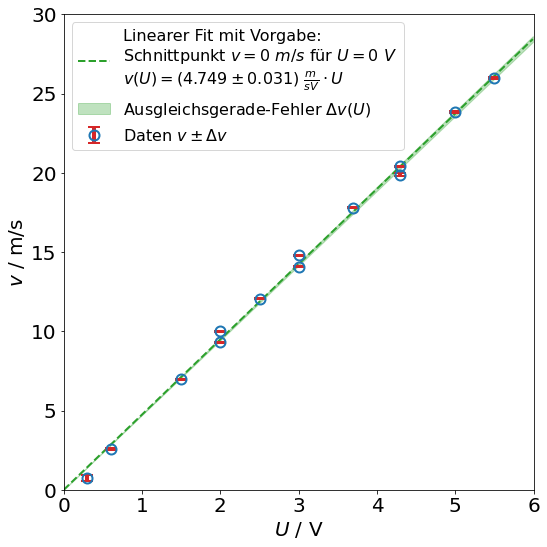

v [ 0.72662237  2.56899802  6.96951692  9.3053066  10.01579815 12.0496688
 14.07098166 14.80242303 17.79854039 20.42313033 19.8993731  23.82390756
 26.00912263]


C:\Users\timom\anaconda3\lib\site-packages\sigfig\sigfig.py:265: UserWarning: cannot have less that 1 significant figure, setting to 1
  warn('cannot have less that 1 significant figure, setting to 1')


TypeError: Invalid input type of <class 'numpy.ndarray'>, expecting 1 of (<class 'numbers.Number'>, <class 'str'>, <class 'decimal.Decimal'>, <class 'sigfig.sigfig._Number'>, <class 'NoneType'>)

In [84]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
U =     np.array([0.3,   0.6,   1.5,     2,      2,      2.5,    3,      3,     3.7,     4.3,    4.3,    5,  5.5])
x =     np.array([1,     12.5,  92,      164,    76,     110,    150,    83,    120,     158,    60,     86, 102.5]) * 0.001 # in m 
alpha = np.array([1/25,  1/25,  1/25,    1/25,   1/10,   1/10,   1/10,   1/5,   1/5,     1/5,    1/2,    1/2, 1/2])
U_total = np.arange(0,6,0.01)

def velocity(x):
    v = np.sqrt((2*rho_Fluid*x*alpha*g)/rho_Luft)
    return v


def velocity_error(x):
    delta_v = alpha*g*rho_Fluid/rho_Luft * (2*x*alpha*g*rho_Fluid/rho_Luft)**(-1/2)*Delta_x
    return delta_v

v = velocity(x)
delta_v = velocity_error(x)
ax.errorbar(U, v, delta_v, zorder=3, label="Daten $v \pm \Delta v$", fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle="none", markeredgewidth=2)
# ax.plot(U, v, ls="--", alpha=0.6)

# Fit y = m * x
def linear (x, m):
    y = m * x
    return y

# Initial guess 
guess = [5]
parameters, covariance = curve_fit(linear, U, v, p0=guess)
std_error = np.sqrt(np.diag(covariance))
m = np.round(parameters[0], 3)
delta_m = np.round(std_error[0], 3)
fit_y = linear(U_total, m)

label = f"Linearer Fit mit Vorgabe:\nSchnittpunkt $v = 0\ m/s$ für $U = 0\ V$\n$v(U)=({{{parameters[0]:.3f}}} \pm {{{std_error[0]:.3f}}})\ \\frac{{m}}{{s V}} \\cdot U$"
ax.plot(U_total, fit_y, ls = "--", c="C2", label=label, zorder=2)

ax.fill_between(U_total, fit_y-delta_m*U_total, fit_y+delta_m*U_total, color="C2", alpha=0.3, zorder=1, label="Ausgleichsgerade-Fehler $\\Delta v(U)$")

# Other Fit Alternatives
print(f"curve_fit: m = {parameters[0]:.3f} +/- {std_error[0]:.3f}")
# Polyfit but intercept at b=0 is not possible
res = stats.linregress(U, v)
print(f"Linregress: m = {res.slope:.3f}, b = {res.intercept:.3f}")
# ax.plot(U, res.intercept + res.slope*U, 'r', label='fitted line') # Same

p = np.polyfit(U,v,1)  
f = np.poly1d(p) 
print(f"Polyfit: m = {p[0]:.3f}, b = {p[1]:.3f}")
# ax.plot(U,f(U), 'b-',label="Polyfit")

ax.set_xlabel("$U$ / V")
ax.set_ylabel("$v$ / m/s")
ax.set_xlim(0, 6)
ax.set_ylim(0, 30)

ax.legend()
plt.tight_layout()
plt.savefig("Abb/Kalibrierung_Prandlt_3_1.png")
plt.show()
print("v", v)
# round_v = list(map(round_to_n, v))
round_v = list(map(round_to_1, v))
# round_v = round_to_n(v,1)
round_to_n(v)
print("v", round_v)
# print("Delta_v", delta_v)
# round_delta_v = np.array([round_to_n(i,2) for i in delta_v])
# print("Delta_v", round_delta_v)


const, m, B
0.21584983263939916 0.0025204733629594386 9.259900552405737


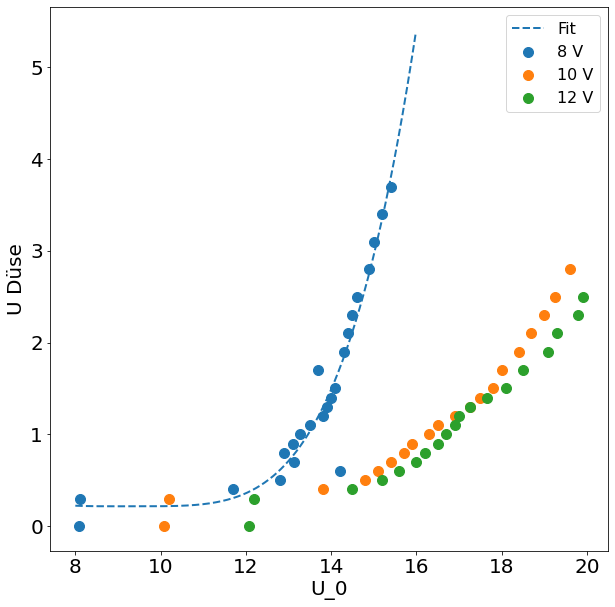

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
U_D_8 = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1, 3.4, 3.7])
U_0_8 = np.array([8.08, 8.1, 11.7, 12.8, 14.2, 13.14, 12.9, 13.1, 13.26, 13.5, 13.8, 13.9, 14, 14.1, 13.7, 14.3, 14.4, 14.5, 14.6, 14.9, 15, 15.2, 15.4])
U_total = np.arange(8,16,0.01)

U_D_10 = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8])
U_0_10 = np.array([10.07, 10.2, 13.8, 14.8, 15.1, 15.4, 15.7, 15.9, 16.3, 16.5, 16.9, 17.25, 17.5, 17.8, 18, 18.4, 18.7, 19, 19.25, 19.6])

U_D_12 = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5])
U_0_12 = np.array([12.07, 12.2, 14.5, 15.2, 15.6, 16, 16.2, 16.5, 16.7, 16.9, 17, 17.25, 17.65, 18.1, 18.5, 19.1, 19.3, 19.8, 19.9])

plt.scatter(U_0_8, U_D_8, label ="8 V", c="C0")
plt.scatter(U_0_10, U_D_10, label ="10 V", c="C1")
plt.scatter(U_0_12, U_D_12, label ="12 V", c="C2")

# Fit
def Kings_Law (x, const, m, B):
    y = const + m * (x-B)**4
    return y

guess = [0, 1, 8]
parameters, covariance = curve_fit(Kings_Law, U_0_8, U_D_8, p0=guess)
std_error = np.sqrt(np.diag(covariance))
fit_y = Kings_Law(U_total, *parameters)
print("const, m, B")
print(*parameters)

label="Fit"
ax.plot(U_total, fit_y, ls = "--", c="C0", label=label, zorder=2)

# plt.scatter(U_D_8, U_0_8, label ="8 V")
# plt.scatter(U_D_12, U_D_12, label ="12 V")

ax.set_ylabel("U Düse")
ax.set_xlabel("U_0")
ax.legend()


-2.948141218648089 0.3263389004256444 0.2999189352144725 0.0852719227646985


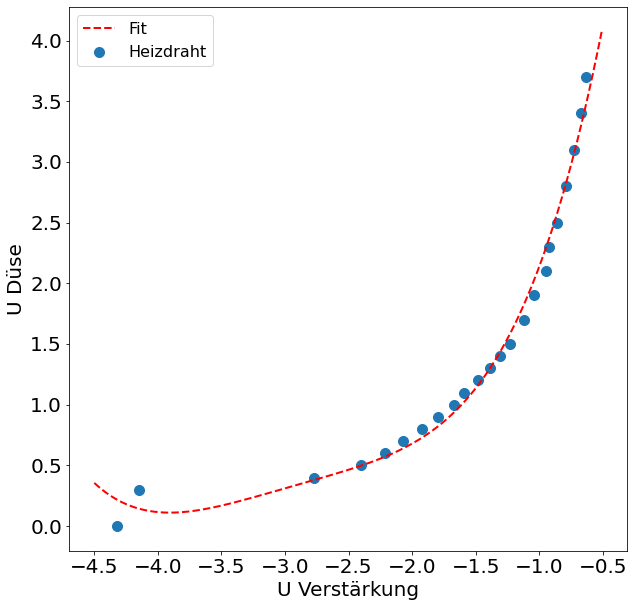

In [60]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
U_D_CCT = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1, 3.4, 3.7])
U_Verst = np.array([4.32, 4.15, 2.77, 2.4, 2.21, 2.07, 1.92, 1.8, 1.67, 1.59, 1.48, 1.39, 1.31, 1.23, 1.12, 1.04, 0.95, 0.92, 0.86, 0.79, 0.73, 0.67, 0.63])*(-1)
U_total = np.arange(-4.5, -0.5, 0.01)

plt.scatter (U_Verst, U_D_CCT, label="Heizdraht")

# Fit
def Heizdraht_CCA (x, c, b, a1, a2):
    x_n = x-c # moved on x-axis
    y = a1*x_n + a2*x_n**4 + b
    return y

guess = [-4, 0.5, 1, 1]
parameters, covariance = curve_fit(Heizdraht_CCA, U_Verst, U_D_CCT, p0=guess)
std_error = np.sqrt(np.diag(covariance))
fit_y = Heizdraht_CCA(U_total, *parameters)

label="Fit"
ax.plot(U_total, fit_y, ls = "--", c="r", label=label, zorder=2)

ax.set_ylabel("U Düse")
ax.set_xlabel("U Verstärkung")
ax.legend()
print(*parameters)

In [35]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

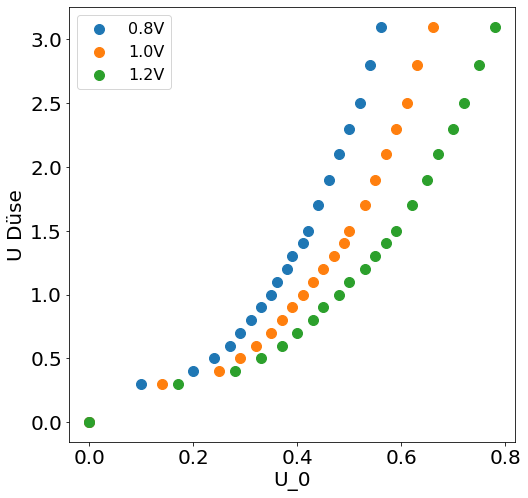

In [9]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

U_D_0_8 = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1])
U_0_0_8 = np.array([0.8, 0.9, 1.0, 1.04, 1.07, 1.09, 1.11, 1.13, 1.15, 1.16, 1.18, 1.19, 1.21, 1.22, 1.24, 1.26, 1.28, 1.30, 1.32, 1.34, 1.36])-0.8
U_0_1_0 = np.array([1.0, 1.14, 1.25, 1.29, 1.32, 1.35, 1.37, 1.39, 1.41, 1.43, 1.45, 1.47, 1.49, 1.50, 1.53, 1.55, 1.57, 1.59, 1.61, 1.63, 1.66])-1.0
U_0_1_2 = np.array([1.2, 1.37, 1.48, 1.53, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.77, 1.79, 1.82, 1.85, 1.87, 1.90, 1.92, 1.95, 1.98])-1.2

ax.scatter(U_0_0_8, U_D_0_8, label="0.8V")
ax.scatter(U_0_1_0, U_D_0_8, label="1.0V")
ax.scatter(U_0_1_2, U_D_0_8, label="1.2V")


ax.set_ylabel("U Düse")
ax.set_xlabel("U_0")
ax.legend()

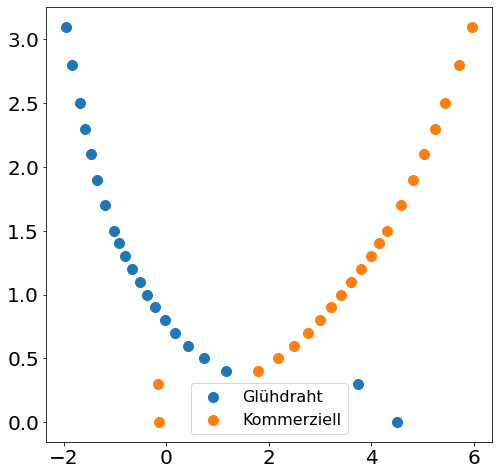

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,8))

U_D_0_8 = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1])
U_Draht = np.array([4.5, 3.74, 1.16, 0.73, 0.42, 0.17, -0.03, -0.21, -0.38, -0.52, -0.67, -0.80, -0.92, -1.02, -1.19, -1.34, -1.46, -1.58, -1.69, -1.83, -1.95])
U_Komm = np.array([-0.14, -0.15, 1.79, 2.19, 2.50, 2.77, 3.00, 3.22, 3.42, 3.61, 3.81, 3.99, 4.16, 4.31, 4.58, 4.82, 5.04, 5.25, 5.45, 5.72, 5.97])

ax.scatter(U_Draht, U_D_0_8, label="Glühdraht")
ax.scatter(U_Komm, U_D_0_8, label= "Kommerziell")
ax.legend()

In [3]:
len(U)

13